### Data science

#### Preliminary analysis:

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

##### a. Import the datasets into the Python environment

In [2]:
df_sales=pd.read_csv("sales.csv")
df_rest=pd.read_csv("resturants.csv")
df_items=pd.read_csv("items.csv")

##### b. Examine the dataset's shape and structure, and look out for any outlier

In [3]:
print(f'Sales Dataset shape: {df_sales.shape}')
df_sales.head()

Sales Dataset shape: (109600, 4)


,date,item_id,price,item_count
0,2019-01-01,3,29.22,2.0
1,2019-01-01,4,26.42,22.0
2,2019-01-01,12,4.87,7.0
3,2019-01-01,13,4.18,12.0
4,2019-01-01,16,3.21,136.0


In [4]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109600 entries, 0 to 109599
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   date        109600 non-null  object 
 1   item_id     109600 non-null  int64  
 2   price       109600 non-null  float64
 3   item_count  109600 non-null  float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.3+ MB


In [5]:
print(f'Restaurants Dataset shape: {df_rest.shape}')
df_rest.head()

Restaurants Dataset shape: (6, 2)


,id,name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe


In [6]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      6 non-null      int64 
 1   name    6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [7]:
print(f'Items Dataset shape: {df_items.shape}')
df_items.head()

Items Dataset shape: (100, 5)


,id,store_id,name,kcal,cost
0,1,4,Chocolate Cake,554,6.71
1,2,4,Breaded Fish with Vegetables Meal,772,15.09
2,3,1,Sweet Fruity Cake,931,29.22
3,4,1,Amazing Steak Dinner with Rolls,763,26.42
4,5,5,Milk Cake,583,6.07


In [8]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        100 non-null    int64  
 1   store_id  100 non-null    int64  
 2   name      100 non-null    object 
 3   kcal      100 non-null    int64  
 4   cost      100 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.0+ KB


<AxesSubplot: >

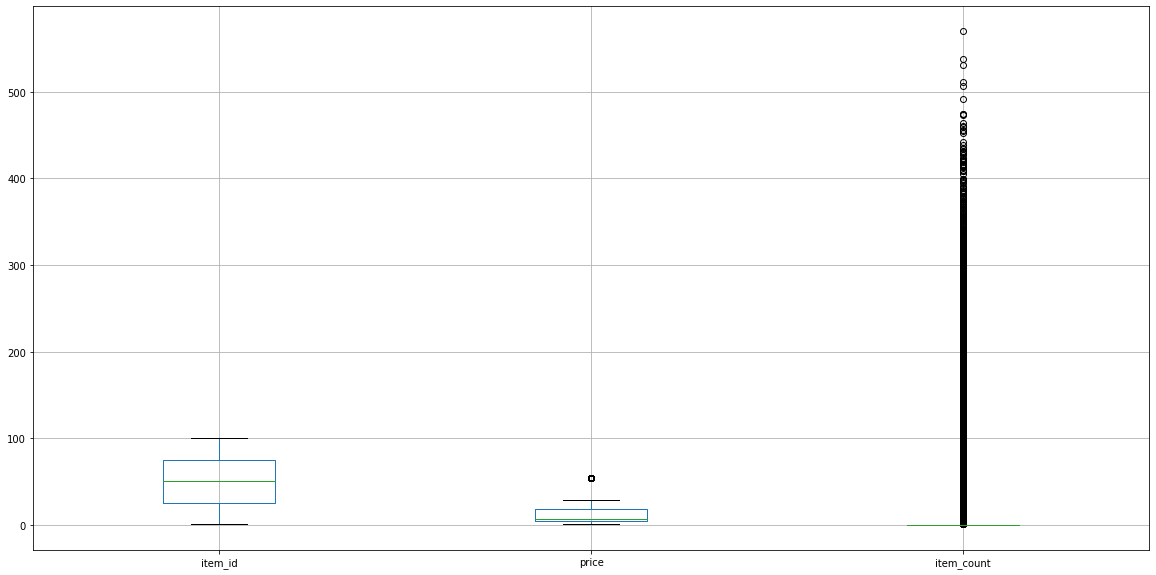

In [9]:
plt.figure(figsize=(20,10))
df_sales.boxplot()

The price column contains outliers in df_sales

<AxesSubplot: >

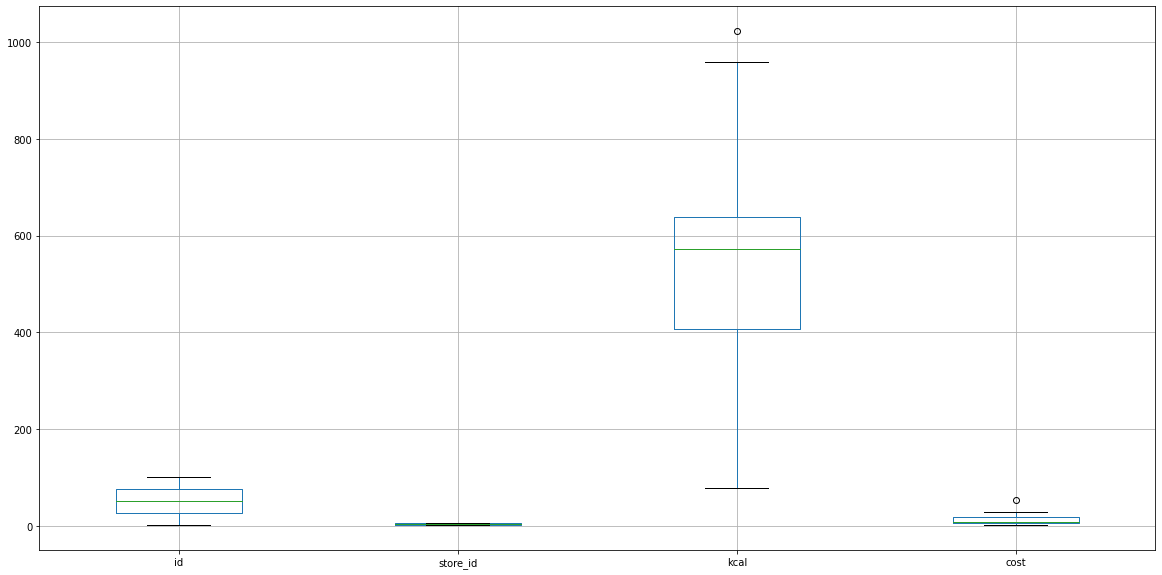

In [10]:
plt.figure(figsize=(20,10))
df_items.boxplot()

The kcal and cost columns contain outliers in df_items

In [11]:
df_sales.describe()

,item_id,price,item_count
count,109600.000000,109600.000000,109600.000000
mean,50.500000,11.763700,6.339297
std,28.866202,8.946225,30.003728
min,1.000000,1.390000,0.000000
25%,25.750000,5.280000,0.000000
50%,50.500000,7.625000,0.000000
75%,75.250000,18.790000,0.000000
max,100.000000,53.980000,570.000000


In [12]:
df_items.describe()

,id,store_id,kcal,cost
count,100.000000,100.000000,100.000000,100.000000
mean,50.500000,3.520000,536.730000,11.763700
std,29.011492,1.708446,202.212852,8.991254
min,1.000000,1.000000,78.000000,1.390000
25%,25.750000,2.000000,406.250000,5.280000
50%,50.500000,4.000000,572.500000,7.625000
75%,75.250000,5.000000,638.250000,18.790000
max,100.000000,6.000000,1023.000000,53.980000


In [13]:
IQR = df_sales['price'].quantile(0.75)-df_sales['price'].quantile(0.25) 
print(IQR)

13.509999999999998


In [14]:
Upper_OutlierLimit = df_sales['price'].quantile(0.75) + 1.5*IQR
Lower_OutlierLimit = df_sales['price'].quantile(0.25) - 1.5*IQR 
print(Upper_OutlierLimit)
print(Lower_OutlierLimit) 

39.05499999999999
-14.984999999999996


In [15]:
OutlierValues = df_sales[df_sales['price']>=Upper_OutlierLimit]

In [16]:
OutlierValues

,date,item_id,price,item_count
82,2019-01-01,80,53.98,0.0
115,2019-01-02,80,53.98,2.0
216,2019-01-03,80,53.98,2.0
316,2019-01-04,80,53.98,1.0
482,2019-01-05,80,53.98,0.0
...,...,...,...,...
109119,2021-12-27,80,53.98,1.0
109280,2021-12-28,80,53.98,0.0
109379,2021-12-29,80,53.98,0.0
109480,2021-12-30,80,53.98,0.0


In [17]:
OutlierValues.reset_index(inplace=True)

In [18]:
value=df_sales['price'].quantile(0.95)
value

26.47249999998778

In [19]:
for i in (OutlierValues['index']):
    df_sales['price'][i]=value

/tmp/ipykernel_5527/479626633.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sales['price'][i]=value


<AxesSubplot: >

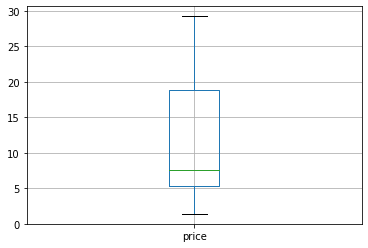

In [20]:
 df_sales.boxplot(column='price')

<AxesSubplot: >

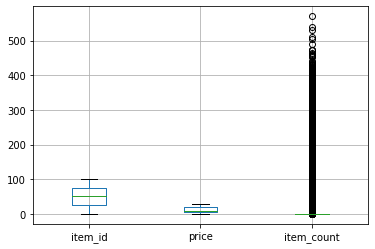

In [21]:
 df_sales.boxplot()

In [22]:
IQR = df_sales['item_count'].quantile(0.75)-df_sales['item_count'].quantile(0.25) 
print(IQR)

0.0


In [23]:
Upper_OutlierLimit = df_sales['item_count'].quantile(0.75) + 1.5*IQR
print(Upper_OutlierLimit)

0.0


In [24]:
OutlierValues = df_sales[df_sales['item_count']>=Upper_OutlierLimit]
OutlierValues

,date,item_id,price,item_count
0,2019-01-01,3,29.22,2.0
1,2019-01-01,4,26.42,22.0
2,2019-01-01,12,4.87,7.0
3,2019-01-01,13,4.18,12.0
4,2019-01-01,16,3.21,136.0
...,...,...,...,...
109595,2021-12-31,96,21.93,0.0
109596,2021-12-31,97,28.65,0.0
109597,2021-12-31,98,5.00,0.0
109598,2021-12-31,99,5.32,0.0


In [25]:
IQR = df_items['kcal'].quantile(0.75)-df_items['kcal'].quantile(0.25) 
print(IQR)

232.0


In [26]:
Upper_OutlierLimit = df_items['kcal'].quantile(0.75) + 1.5*IQR
print(Upper_OutlierLimit)

986.25


In [27]:
OutlierValues = df_items[df_items['kcal']>=Upper_OutlierLimit]
OutlierValues

,id,store_id,name,kcal,cost
32,33,6,Original Breaded Pork with Vegetables Dinner,1023,20.8


In [28]:
OutlierValues.reset_index(inplace=True)
OutlierValues

,index,id,store_id,name,kcal,cost
0,32,33,6,Original Breaded Pork with Vegetables Dinner,1023,20.8


In [29]:
value=df_items['kcal'].quantile(0.95)
value

848.35

In [30]:
for i in (OutlierValues['index']):
    df_items['kcal'][i]=value

/tmp/ipykernel_5527/2233376963.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['kcal'][i]=value


<AxesSubplot: >

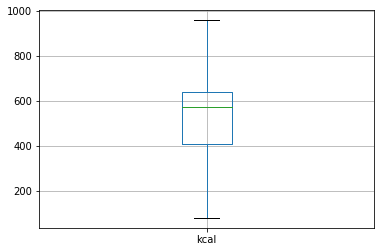

In [31]:
 df_items.boxplot(column='kcal')

In [32]:
IQR = df_items['cost'].quantile(0.75)-df_items['cost'].quantile(0.25) 
print(IQR)

13.509999999999998


In [33]:
Upper_OutlierLimit = df_items['cost'].quantile(0.75) + 1.5*IQR
print(Upper_OutlierLimit)

39.05499999999999


In [34]:
OutlierValues = df_items[df_items['cost']>=Upper_OutlierLimit]
OutlierValues

,id,store_id,name,kcal,cost
79,80,4,Blue Ribbon Fruity Vegi Lunch,881.0,53.98


In [35]:
OutlierValues.reset_index(inplace=True)
OutlierValues

,index,id,store_id,name,kcal,cost
0,79,80,4,Blue Ribbon Fruity Vegi Lunch,881.0,53.98


In [36]:
value=df_items['cost'].quantile(0.95)
value

26.4725

In [37]:
for i in (OutlierValues['index']):
    df_items['cost'][i]=value

/tmp/ipykernel_5527/2347323621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_items['cost'][i]=value


<AxesSubplot: >

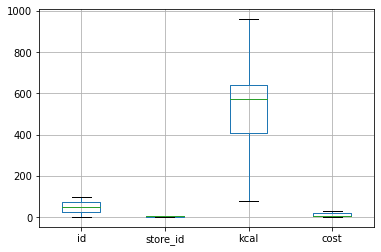

In [38]:
 df_items.boxplot()

##### Checking for duplicates and nulls in the df

In [39]:
print(df_sales.index.is_unique)
print(df_sales.columns.is_unique)
print(df_sales[df_sales.duplicated() == True])

True
True
Empty DataFrame
Columns: [date, item_id, price, item_count]
Index: []


In [40]:
print(df_items.index.is_unique)
print(df_items.columns.is_unique)
print(df_items[df_items.duplicated() == True])

True
True
Empty DataFrame
Columns: [id, store_id, name, kcal, cost]
Index: []


In [41]:
print(df_rest.index.is_unique)
print(df_rest.columns.is_unique)
print(df_rest[df_rest.duplicated() == True])

True
True
Empty DataFrame
Columns: [id, name]
Index: []


In [42]:
print(df_sales.isna())

         date  item_id  price  item_count
0       False    False  False       False
1       False    False  False       False
2       False    False  False       False
3       False    False  False       False
4       False    False  False       False
...       ...      ...    ...         ...
109595  False    False  False       False
109596  False    False  False       False
109597  False    False  False       False
109598  False    False  False       False
109599  False    False  False       False

[109600 rows x 4 columns]


In [43]:
print(df_items.isna())

       id  store_id   name   kcal   cost
0   False     False  False  False  False
1   False     False  False  False  False
2   False     False  False  False  False
3   False     False  False  False  False
4   False     False  False  False  False
..    ...       ...    ...    ...    ...
95  False     False  False  False  False
96  False     False  False  False  False
97  False     False  False  False  False
98  False     False  False  False  False
99  False     False  False  False  False

[100 rows x 5 columns]


In [44]:
print(df_rest.isna())

      id   name
0  False  False
1  False  False
2  False  False
3  False  False
4  False  False
5  False  False


##### Renaming the columns to merge the df

In [45]:
df_rest = df_rest.rename(columns = {'id': 'store_id','name':'store_name'})
df_rest=df_rest.rename(columns=lambda x: x.strip())

In [46]:
df_rest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   store_id    6 non-null      int64 
 1   store_name  6 non-null      object
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


In [47]:
df_items = df_items.rename(columns = {'id': 'item_id','name':'item_name','cost':'price'})
df_items=df_items.rename(columns=lambda x: x.strip())

In [48]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   item_id    100 non-null    int64  
 1   store_id   100 non-null    int64  
 2   item_name  100 non-null    object 
 3   kcal       100 non-null    float64
 4   price      100 non-null    float64
dtypes: float64(2), int64(2), object(1)
memory usage: 4.0+ KB


In [49]:
df_items

,item_id,store_id,item_name,kcal,price
0,1,4,Chocolate Cake,554.0,6.71
1,2,4,Breaded Fish with Vegetables Meal,772.0,15.09
2,3,1,Sweet Fruity Cake,931.0,29.22
3,4,1,Amazing Steak Dinner with Rolls,763.0,26.42
4,5,5,Milk Cake,583.0,6.07
...,...,...,...,...,...
95,96,5,Blue Ribbon Fish with Bread Lunch,708.0,21.93
96,97,4,Original Fruity Cod with Bread and Vegetables ...,744.0,28.65
97,98,2,Original Sweet Milky Soft Drink,579.0,5.00
98,99,4,Frozen Tomato Soft Drink,423.0,5.32


In [50]:
df_rest

,store_id,store_name
0,1,Bob's Diner
1,2,Beachfront Bar
2,3,Sweet Shack
3,4,Fou Cher
4,5,Corner Cafe
5,6,Surfs Up


##### Merging the df_items and df_rest based on store_id

In [51]:
df = pd.merge(df_items, df_rest, on = 'store_id', how = 'left')

In [52]:
df.head()

,item_id,store_id,item_name,kcal,price,store_name
0,1,4,Chocolate Cake,554.0,6.71,Fou Cher
1,2,4,Breaded Fish with Vegetables Meal,772.0,15.09,Fou Cher
2,3,1,Sweet Fruity Cake,931.0,29.22,Bob's Diner
3,4,1,Amazing Steak Dinner with Rolls,763.0,26.42,Bob's Diner
4,5,5,Milk Cake,583.0,6.07,Corner Cafe


In [53]:
df_sales=df_sales.rename(columns=lambda x: x.strip())

In [54]:
df_sales

,date,item_id,price,item_count
0,2019-01-01,3,29.22,2.0
1,2019-01-01,4,26.42,22.0
2,2019-01-01,12,4.87,7.0
3,2019-01-01,13,4.18,12.0
4,2019-01-01,16,3.21,136.0
...,...,...,...,...
109595,2021-12-31,96,21.93,0.0
109596,2021-12-31,97,28.65,0.0
109597,2021-12-31,98,5.00,0.0
109598,2021-12-31,99,5.32,0.0


##### Merging the resultant df with the df_sales based on item_id

In [55]:
df=pd.merge(df_sales,df,on=['item_id'],how='left')

In [56]:
df.head()

,date,item_id,price_x,item_count,store_id,item_name,kcal,price_y,store_name
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931.0,29.22,Bob's Diner
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763.0,26.42,Bob's Diner
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478.0,4.87,Bob's Diner
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490.0,4.18,Bob's Diner
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284.0,3.21,Bob's Diner


##### Dropping the price column from right df

In [57]:
df=df.drop(columns='price_y')

In [58]:
df = df.rename(columns = {'price_x': 'price'})

In [59]:
df

,date,item_id,price,item_count,store_id,item_name,kcal,store_name
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931.0,Bob's Diner
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763.0,Bob's Diner
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478.0,Bob's Diner
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490.0,Bob's Diner
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284.0,Bob's Diner
...,...,...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,5,Blue Ribbon Fish with Bread Lunch,708.0,Corner Cafe
109596,2021-12-31,97,28.65,0.0,4,Original Fruity Cod with Bread and Vegetables ...,744.0,Fou Cher
109597,2021-12-31,98,5.00,0.0,2,Original Sweet Milky Soft Drink,579.0,Beachfront Bar
109598,2021-12-31,99,5.32,0.0,4,Frozen Tomato Soft Drink,423.0,Fou Cher


<AxesSubplot: >

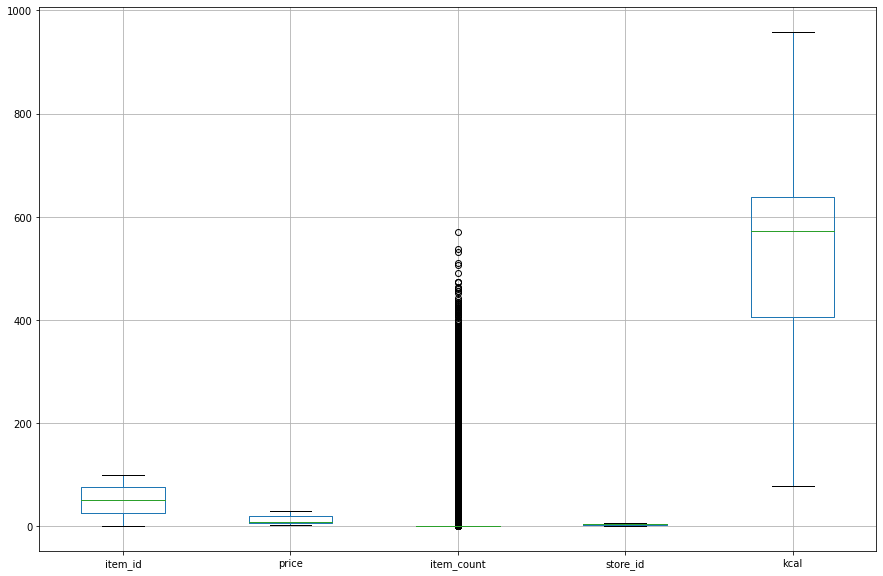

In [60]:
plt.figure(figsize=(15,10))
df.boxplot()

##### Changing the datatype of date column to datetime

In [61]:
df['date'] = pd.to_datetime(df['date'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109600 entries, 0 to 109599
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   date        109600 non-null  datetime64[ns]
 1   item_id     109600 non-null  int64         
 2   price       109600 non-null  float64       
 3   item_count  109600 non-null  float64       
 4   store_id    109600 non-null  int64         
 5   item_name   109600 non-null  object        
 6   kcal        109600 non-null  float64       
 7   store_name  109600 non-null  object        
dtypes: datetime64[ns](1), float64(3), int64(2), object(2)
memory usage: 7.5+ MB


#### Exploratory data analysis:

##### a. Examine the overall date wise sales to understand the pattern

In [63]:
 df['sales']=df['item_count']*df['price']

In [64]:
df

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,sales
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931.0,Bob's Diner,58.44
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763.0,Bob's Diner,581.24
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478.0,Bob's Diner,34.09
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490.0,Bob's Diner,50.16
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284.0,Bob's Diner,436.56
...,...,...,...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,5,Blue Ribbon Fish with Bread Lunch,708.0,Corner Cafe,0.00
109596,2021-12-31,97,28.65,0.0,4,Original Fruity Cod with Bread and Vegetables ...,744.0,Fou Cher,0.00
109597,2021-12-31,98,5.00,0.0,2,Original Sweet Milky Soft Drink,579.0,Beachfront Bar,0.00
109598,2021-12-31,99,5.32,0.0,4,Frozen Tomato Soft Drink,423.0,Fou Cher,0.00


In [65]:
df['day_of_week'] = df['date'].dt.day_name()
df['month']=df['date'].dt.month_name()
df['quarter']=df['date'].dt.quarter
df

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,sales,day_of_week,month,quarter
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931.0,Bob's Diner,58.44,Tuesday,January,1
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763.0,Bob's Diner,581.24,Tuesday,January,1
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478.0,Bob's Diner,34.09,Tuesday,January,1
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490.0,Bob's Diner,50.16,Tuesday,January,1
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284.0,Bob's Diner,436.56,Tuesday,January,1
...,...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,5,Blue Ribbon Fish with Bread Lunch,708.0,Corner Cafe,0.00,Friday,December,4
109596,2021-12-31,97,28.65,0.0,4,Original Fruity Cod with Bread and Vegetables ...,744.0,Fou Cher,0.00,Friday,December,4
109597,2021-12-31,98,5.00,0.0,2,Original Sweet Milky Soft Drink,579.0,Beachfront Bar,0.00,Friday,December,4
109598,2021-12-31,99,5.32,0.0,4,Frozen Tomato Soft Drink,423.0,Fou Cher,0.00,Friday,December,4


In [66]:
datewise_sales = df.groupby('date')['sales'].sum().reset_index()

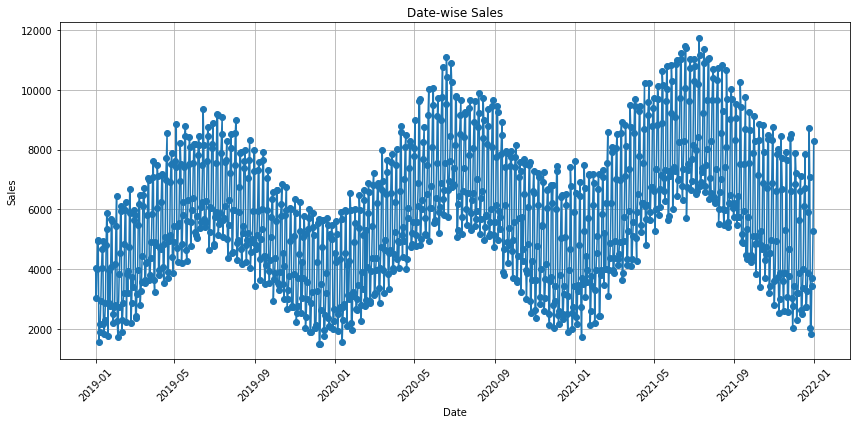

In [67]:
plt.figure(figsize=(12, 6))
plt.plot(datewise_sales['date'], datewise_sales['sales'], marker='o')
plt.title('Date-wise Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The sales is high at every Q2 and Q3

##### b. Find out how sales fluctuate across different days of the week

In [68]:
daywise_sales = df.groupby('day_of_week')['sales'].sum().reset_index()

In [69]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daywise_sales['day_of_week'] = pd.Categorical(daywise_sales['day_of_week'], categories=day_order, ordered=True)
daywise_sales = daywise_sales.sort_values('day_of_week')

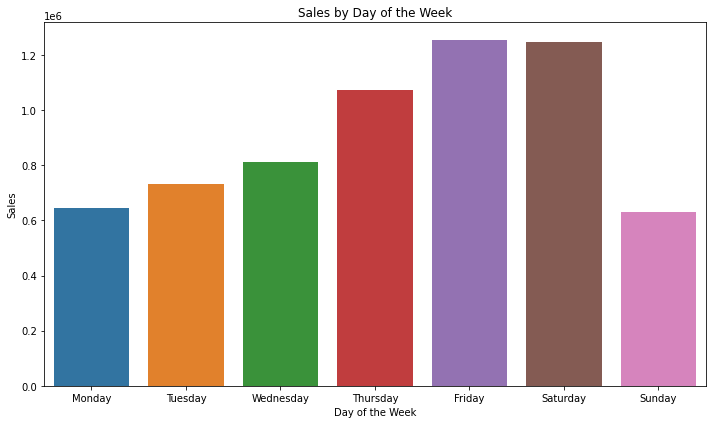

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='sales', data=daywise_sales)
plt.title('Sales by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

Fridays have the maximum sales

##### c. Look for any noticeable trends in the sales data for different months of the year

In [71]:
monthwise_sales = df.groupby('month')['sales'].sum().reset_index()

In [72]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthwise_sales['month'] = pd.Categorical(monthwise_sales['month'], categories=month_order, ordered=True)
monthwise_sales = monthwise_sales.sort_values('month')

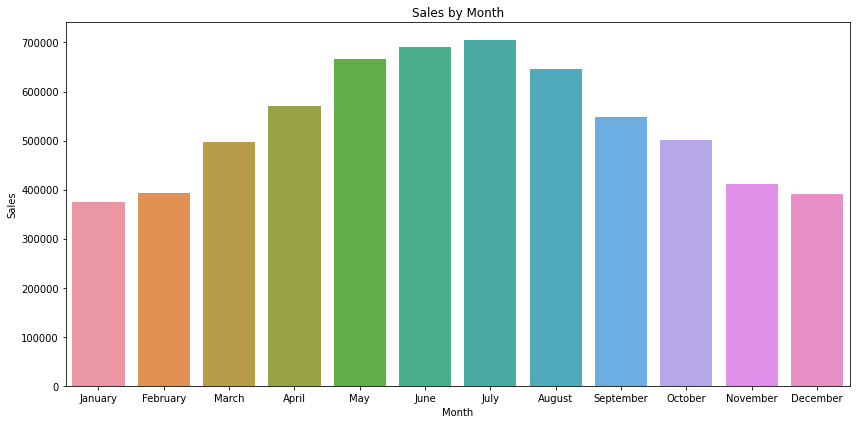

In [73]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='sales', data=monthwise_sales)
plt.title('Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

July has the maximum sales

##### d. Examine the sales distribution across different quarters averaged over the years. Identify any noticeable patterns.

In [74]:
quarterwise_sales = df.groupby('quarter')['sales'].mean().reset_index()

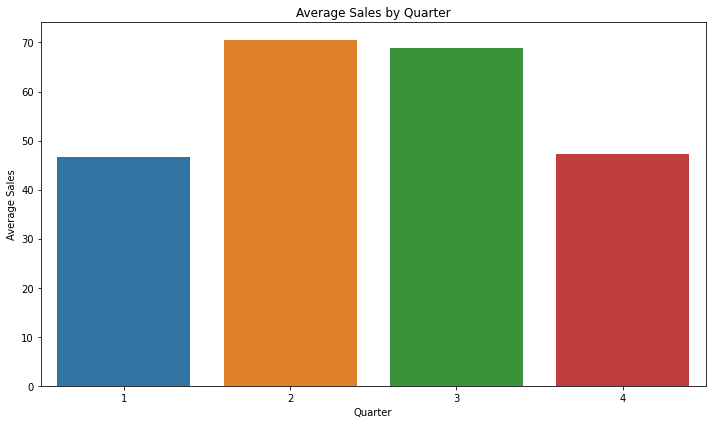

In [75]:
plt.figure(figsize=(10, 6))
sns.barplot(x='quarter', y='sales', data=quarterwise_sales)
plt.title('Average Sales by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Average Sales')
plt.tight_layout()
plt.show()

Q2 has the maximum sales

##### e. Compare the performances of the different restaurants. Find out which restaurant had the most sales and look at the sales for each restaurant across different years, months, and days.

In [76]:
restaurantwise_sales = df.groupby('store_name')['sales'].sum().reset_index()

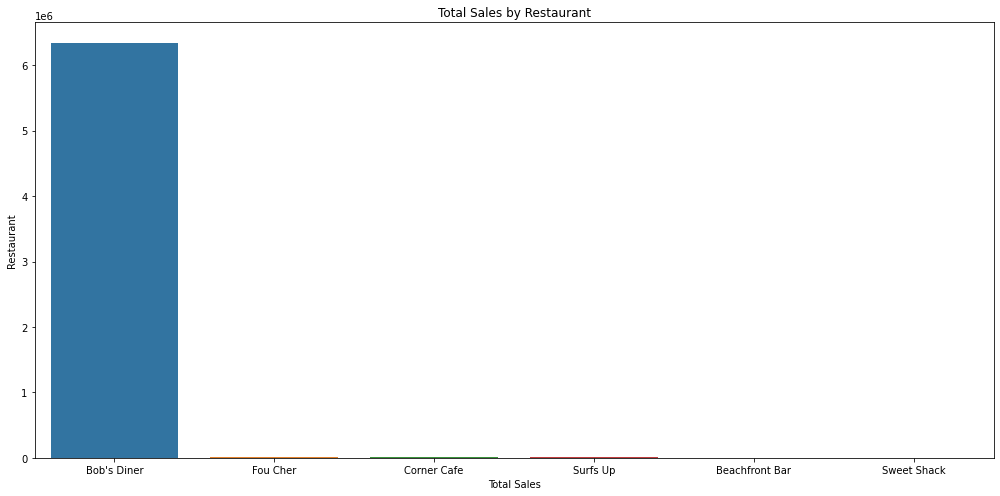

In [77]:
plt.figure(figsize=(14, 7))
sns.barplot(x='store_name', y='sales', data=restaurantwise_sales.sort_values('sales', ascending=False))
plt.title('Total Sales by Restaurant')
plt.xlabel('Total Sales')
plt.ylabel('Restaurant')
plt.tight_layout()
plt.show()

Bob's Diner has the maximum sales

In [78]:
df['year']=df['date'].dt.year
df

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,sales,day_of_week,month,quarter,year
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931.0,Bob's Diner,58.44,Tuesday,January,1,2019
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763.0,Bob's Diner,581.24,Tuesday,January,1,2019
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478.0,Bob's Diner,34.09,Tuesday,January,1,2019
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490.0,Bob's Diner,50.16,Tuesday,January,1,2019
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284.0,Bob's Diner,436.56,Tuesday,January,1,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,5,Blue Ribbon Fish with Bread Lunch,708.0,Corner Cafe,0.00,Friday,December,4,2021
109596,2021-12-31,97,28.65,0.0,4,Original Fruity Cod with Bread and Vegetables ...,744.0,Fou Cher,0.00,Friday,December,4,2021
109597,2021-12-31,98,5.00,0.0,2,Original Sweet Milky Soft Drink,579.0,Beachfront Bar,0.00,Friday,December,4,2021
109598,2021-12-31,99,5.32,0.0,4,Frozen Tomato Soft Drink,423.0,Fou Cher,0.00,Friday,December,4,2021


In [79]:
yearly_restaurant_sales = df.groupby(['store_name', 'year'])['sales'].sum().reset_index()

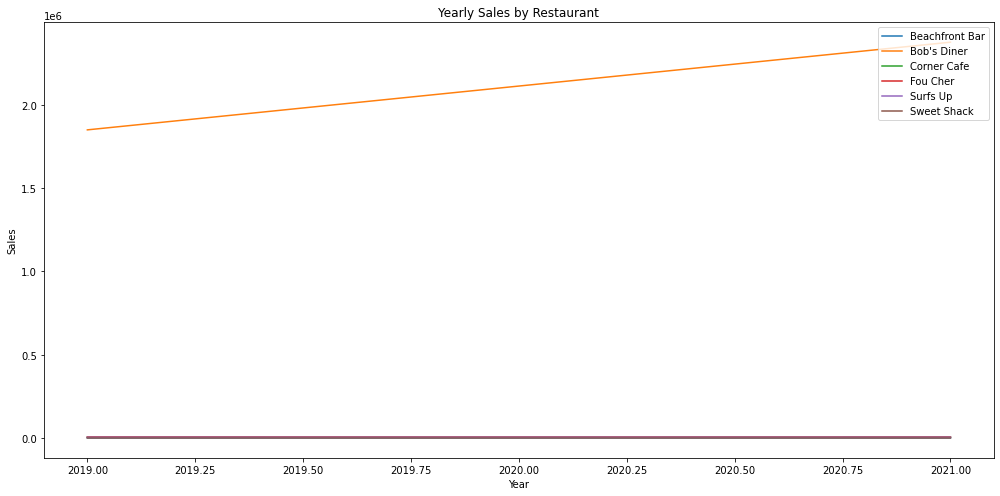

In [80]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='year', y='sales', hue='store_name', data=yearly_restaurant_sales)
plt.title('Yearly Sales by Restaurant')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

The sales is continously increasing Y-O-Y at Bob's Diner the remaining once have a constant sales

In [81]:
monthly_restaurant_sales = df.groupby(['store_name', 'month'])['sales'].sum().reset_index()

In [82]:
monthly_restaurant_sales['month'] = pd.Categorical(monthly_restaurant_sales['month'], categories=month_order, ordered=True)
monthly_restaurant_sales = monthly_restaurant_sales.sort_values('month')

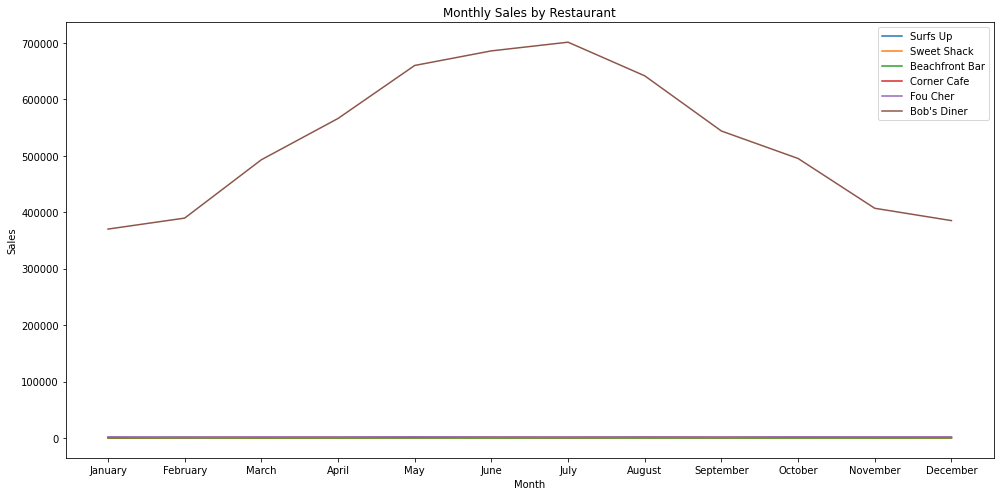

In [83]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='month', y='sales', hue='store_name', data=monthly_restaurant_sales)
plt.title('Monthly Sales by Restaurant')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Bob's Diner has highest sales especially in the month of July

In [84]:
daily_restaurant_sales = df.groupby(['store_name', 'day_of_week'])['sales'].sum().reset_index()

In [85]:
daily_restaurant_sales['day_of_week'] = pd.Categorical(daily_restaurant_sales['day_of_week'], categories=day_order, ordered=True)
daily_restaurant_sales = daily_restaurant_sales.sort_values('day_of_week')

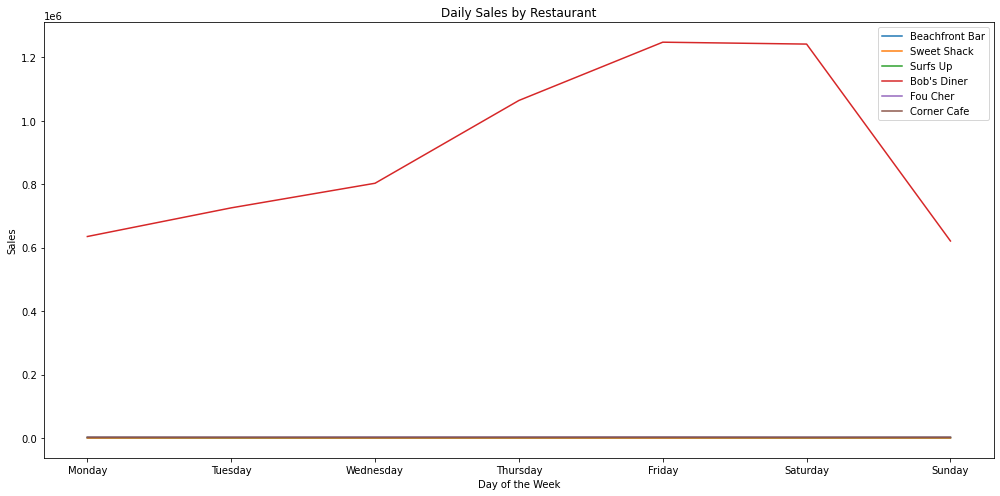

In [86]:
plt.figure(figsize=(14, 7))
sns.lineplot(x='day_of_week', y='sales', hue='store_name', data=daily_restaurant_sales)
plt.title('Daily Sales by Restaurant')
plt.xlabel('Day of the Week')
plt.ylabel('Sales')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Friday's have the highest sales for Bob's Diner

##### f. Identify the most popular items overall and the stores where they are being sold.

In [87]:
itemwise_sales = df.groupby('item_name')['sales'].sum().reset_index()

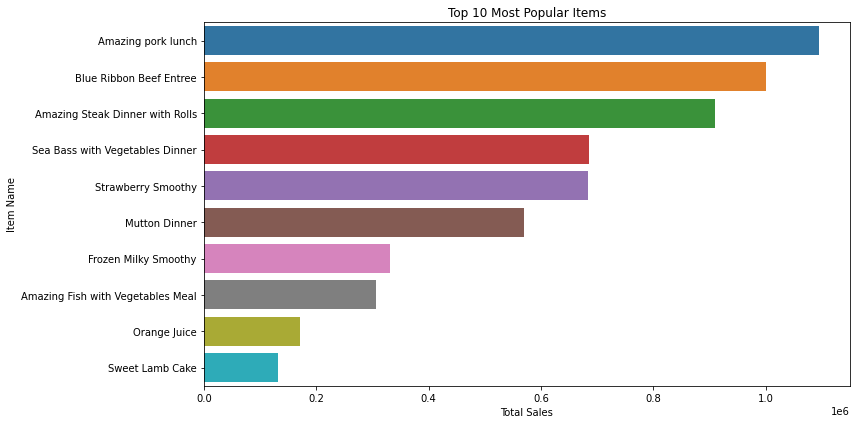

In [88]:
top_items = itemwise_sales.sort_values(by='sales', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x='sales', y='item_name', data=top_items)
plt.title('Top 10 Most Popular Items')
plt.xlabel('Total Sales')
plt.ylabel('Item Name')
plt.tight_layout()
plt.show()

Amazing Pork Lunch is the most popular item

In [89]:
itemstore_sales = df.groupby(['item_name','store_name'])['sales'].sum().reset_index()

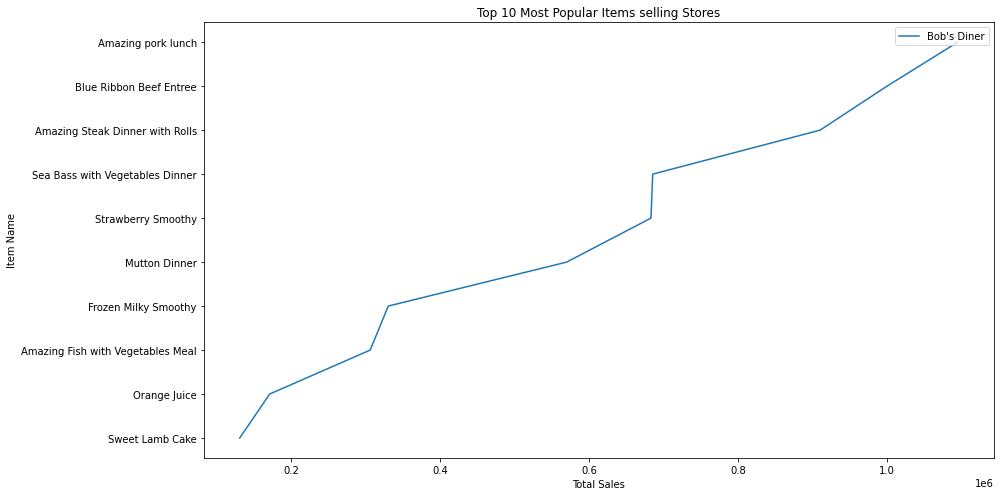

In [90]:
top_itemstore = itemstore_sales.sort_values(by='sales', ascending=False).head(10)
plt.figure(figsize=(14, 7))
sns.lineplot(x='sales', y='item_name', data=top_itemstore, hue='store_name')
plt.title('Top 10 Most Popular Items selling Stores')
plt.xlabel('Total Sales')
plt.ylabel('Item Name')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

#####  Also, find out the most popular item at each store

In [91]:
store_item_sales = df.groupby(['store_name', 'item_name'])['sales'].sum().reset_index()

# Sort the sales in descending order for each store
store_item_sales = store_item_sales.sort_values(['store_name', 'sales'], ascending=[True, False])

# Drop duplicates, keeping the first occurrence, which is the highest sales item for each store
most_popular_items = store_item_sales.drop_duplicates(subset=['store_name'], keep='first').reset_index(drop=True)

# Display the most popular item for each store
print(most_popular_items)

       store_name                      item_name        sales
0  Beachfront Bar        Fantastic Milky Smoothy     3337.770
1     Bob's Diner             Amazing pork lunch  1094500.990
2     Corner Cafe   Awesome Hamburger with Fries     2187.360
3        Fou Cher  Blue Ribbon Fruity Vegi Lunch     7888.805
4        Surfs Up                     Steak Meal     3538.350
5     Sweet Shack                Awesome Smoothy     2351.880


The above are the most popular items at each store

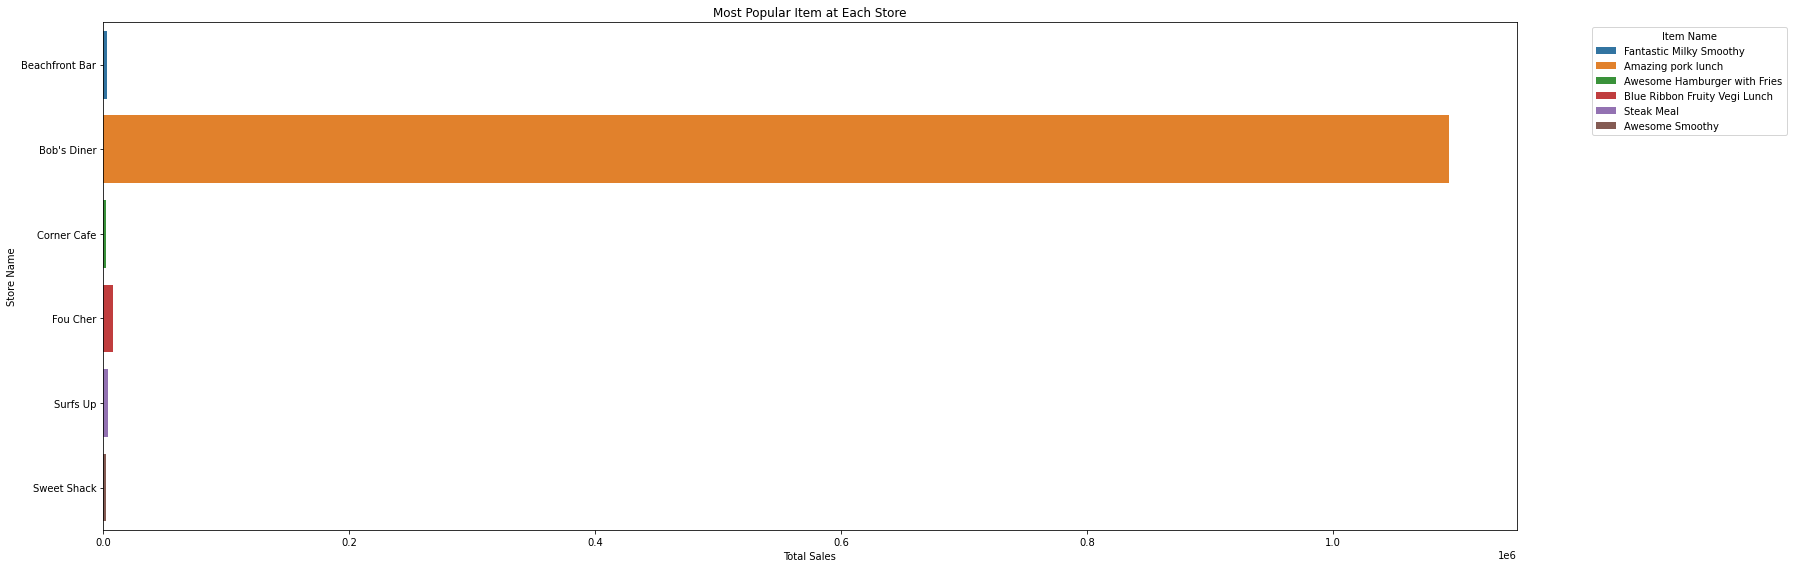

In [92]:
plt.figure(figsize=(25, 8))
sns.barplot(x='sales', y='store_name', hue='item_name', data=most_popular_items, dodge=False)
plt.title('Most Popular Item at Each Store')
plt.xlabel('Total Sales')
plt.ylabel('Store Name')
plt.legend(title='Item Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### g. Determine if the store with the highest sales volume is also making the most money per day

In [93]:
df['daily_revenue'] = df.groupby(['store_name', 'date'])['sales'].sum().reset_index(drop=True)

In [94]:
df

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,sales,day_of_week,month,quarter,year,daily_revenue
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931.0,Bob's Diner,58.44,Tuesday,January,1,2019,2.91
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763.0,Bob's Diner,581.24,Tuesday,January,1,2019,2.91
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478.0,Bob's Diner,34.09,Tuesday,January,1,2019,2.91
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490.0,Bob's Diner,50.16,Tuesday,January,1,2019,5.34
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284.0,Bob's Diner,436.56,Tuesday,January,1,2019,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,5,Blue Ribbon Fish with Bread Lunch,708.0,Corner Cafe,0.00,Friday,December,4,2021,NaN
109596,2021-12-31,97,28.65,0.0,4,Original Fruity Cod with Bread and Vegetables ...,744.0,Fou Cher,0.00,Friday,December,4,2021,NaN
109597,2021-12-31,98,5.00,0.0,2,Original Sweet Milky Soft Drink,579.0,Beachfront Bar,0.00,Friday,December,4,2021,NaN
109598,2021-12-31,99,5.32,0.0,4,Frozen Tomato Soft Drink,423.0,Fou Cher,0.00,Friday,December,4,2021,NaN


In [95]:
store_sales_summary = df.groupby('store_name').agg({
    'sales': 'sum',           # Total sales volume
    'daily_revenue': 'mean'   # Average daily revenue
}).reset_index()

In [96]:
highest_sales_store = store_sales_summary.loc[store_sales_summary['sales'].idxmax()]
print(f"Store with the highest sales volume: {highest_sales_store['store_name']} with {highest_sales_store['sales']} in total sales")

Store with the highest sales volume: Bob's Diner with 6337275.69 in total sales


In [97]:
 store_with_highest_sales_name = highest_sales_store['store_name']
highest_sales_store_avg_revenue = store_sales_summary.loc[store_sales_summary['store_name'] == store_with_highest_sales_name, 'daily_revenue'].values[0]

print(f"Average daily revenue for {store_with_highest_sales_name}: {highest_sales_store_avg_revenue}")

Average daily revenue for Bob's Diner: 963.1574368288055


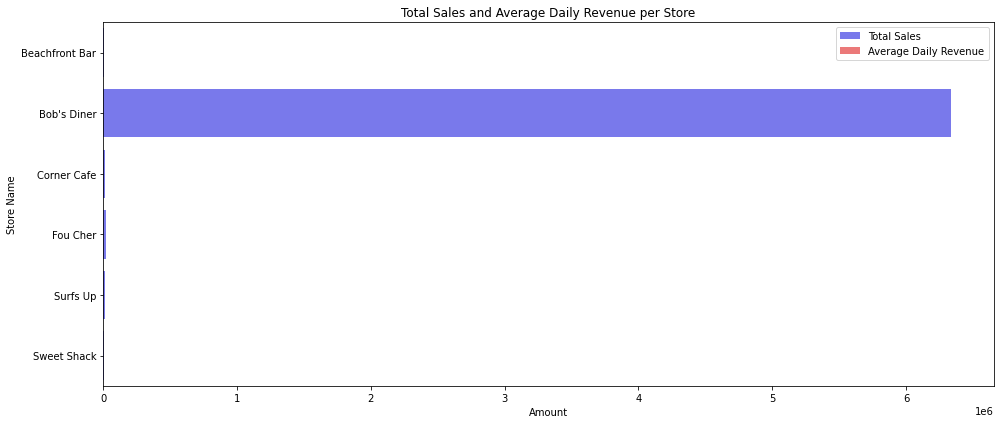

In [98]:
plt.figure(figsize=(14, 6))
sns.barplot(x='sales', y='store_name', data=store_sales_summary, label='Total Sales', color='b', alpha=0.6)
sns.barplot(x='daily_revenue', y='store_name', data=store_sales_summary, label='Average Daily Revenue', color='r', alpha=0.6)
plt.title('Total Sales and Average Daily Revenue per Store')
plt.xlabel('Amount')
plt.ylabel('Store Name')
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()

Yes, the store with the highest sales volume is also making the most money per day

##### h. Identify the most expensive item at each restaurant and find out its calorie count

In [99]:
most_expensive_items = df.loc[df.groupby('store_name')['price'].idxmax()]

In [100]:
most_expensive_items

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,sales,day_of_week,month,quarter,year,daily_revenue
68,2019-01-01,62,5.70,0.0,2,Sweet Vegi Soft Drink,538.0,Beachfront Bar,0.00,Tuesday,January,1,2019,2.91
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931.0,Bob's Diner,58.44,Tuesday,January,1,2019,2.91
58,2019-01-01,50,26.37,0.0,5,Pike Lunch,653.0,Corner Cafe,0.00,Tuesday,January,1,2019,8.73
96,2019-01-01,97,28.65,0.0,4,Original Fruity Cod with Bread and Vegetables ...,744.0,Fou Cher,0.00,Tuesday,January,1,2019,2.91
8,2019-01-01,27,26.21,1.0,6,Steak Meal,607.0,Surfs Up,26.21,Tuesday,January,1,2019,2.91
79,2019-01-01,77,7.70,0.0,3,Blue Ribbon Frozen Milky Cake,636.0,Sweet Shack,0.00,Tuesday,January,1,2019,5.82


In [101]:
most_expensive_items = most_expensive_items[['store_name', 'item_name', 'price', 'kcal']]

In [102]:
most_expensive_items

,store_name,item_name,price,kcal
68,Beachfront Bar,Sweet Vegi Soft Drink,5.70,538.0
0,Bob's Diner,Sweet Fruity Cake,29.22,931.0
58,Corner Cafe,Pike Lunch,26.37,653.0
96,Fou Cher,Original Fruity Cod with Bread and Vegetables ...,28.65,744.0
8,Surfs Up,Steak Meal,26.21,607.0
79,Sweet Shack,Blue Ribbon Frozen Milky Cake,7.70,636.0


Above is the list of most expensiive items and their calorie counts

### Machine learning

#### Forecasting using machine learning algorithms:

##### a. Build and compare linear regression, random forest, and XGBoost models for predictions
    • Generate necessary features for the development of these models, like day of the week, quarter of the year, month, year, day of the month and so on
    • Use the data from the last six months as the testing data
    • Compute the root mean square error (RMSE) values for each model to compare their performances
    • Use the best-performing models to make a forecast for the next year

In [103]:
df

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,sales,day_of_week,month,quarter,year,daily_revenue
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931.0,Bob's Diner,58.44,Tuesday,January,1,2019,2.91
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763.0,Bob's Diner,581.24,Tuesday,January,1,2019,2.91
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478.0,Bob's Diner,34.09,Tuesday,January,1,2019,2.91
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490.0,Bob's Diner,50.16,Tuesday,January,1,2019,5.34
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284.0,Bob's Diner,436.56,Tuesday,January,1,2019,2.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,5,Blue Ribbon Fish with Bread Lunch,708.0,Corner Cafe,0.00,Friday,December,4,2021,NaN
109596,2021-12-31,97,28.65,0.0,4,Original Fruity Cod with Bread and Vegetables ...,744.0,Fou Cher,0.00,Friday,December,4,2021,NaN
109597,2021-12-31,98,5.00,0.0,2,Original Sweet Milky Soft Drink,579.0,Beachfront Bar,0.00,Friday,December,4,2021,NaN
109598,2021-12-31,99,5.32,0.0,4,Frozen Tomato Soft Drink,423.0,Fou Cher,0.00,Friday,December,4,2021,NaN


In [104]:
df['day_of_month'] = df['date'].dt.day

In [105]:
df.drop(columns=['day_of_week','month'])

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,sales,quarter,year,daily_revenue,day_of_month
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931.0,Bob's Diner,58.44,1,2019,2.91,1
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763.0,Bob's Diner,581.24,1,2019,2.91,1
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478.0,Bob's Diner,34.09,1,2019,2.91,1
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490.0,Bob's Diner,50.16,1,2019,5.34,1
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284.0,Bob's Diner,436.56,1,2019,2.91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,5,Blue Ribbon Fish with Bread Lunch,708.0,Corner Cafe,0.00,4,2021,NaN,31
109596,2021-12-31,97,28.65,0.0,4,Original Fruity Cod with Bread and Vegetables ...,744.0,Fou Cher,0.00,4,2021,NaN,31
109597,2021-12-31,98,5.00,0.0,2,Original Sweet Milky Soft Drink,579.0,Beachfront Bar,0.00,4,2021,NaN,31
109598,2021-12-31,99,5.32,0.0,4,Frozen Tomato Soft Drink,423.0,Fou Cher,0.00,4,2021,NaN,31


In [106]:
df['day_of_week'] = df['date'].dt.dayofweek
df['month']=df['date'].dt.month
df

,date,item_id,price,item_count,store_id,item_name,kcal,store_name,sales,day_of_week,month,quarter,year,daily_revenue,day_of_month
0,2019-01-01,3,29.22,2.0,1,Sweet Fruity Cake,931.0,Bob's Diner,58.44,1,1,1,2019,2.91,1
1,2019-01-01,4,26.42,22.0,1,Amazing Steak Dinner with Rolls,763.0,Bob's Diner,581.24,1,1,1,2019,2.91,1
2,2019-01-01,12,4.87,7.0,1,Fantastic Sweet Cola,478.0,Bob's Diner,34.09,1,1,1,2019,2.91,1
3,2019-01-01,13,4.18,12.0,1,Sweet Frozen Soft Drink,490.0,Bob's Diner,50.16,1,1,1,2019,5.34,1
4,2019-01-01,16,3.21,136.0,1,Frozen Milky Smoothy,284.0,Bob's Diner,436.56,1,1,1,2019,2.91,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109595,2021-12-31,96,21.93,0.0,5,Blue Ribbon Fish with Bread Lunch,708.0,Corner Cafe,0.00,4,12,4,2021,NaN,31
109596,2021-12-31,97,28.65,0.0,4,Original Fruity Cod with Bread and Vegetables ...,744.0,Fou Cher,0.00,4,12,4,2021,NaN,31
109597,2021-12-31,98,5.00,0.0,2,Original Sweet Milky Soft Drink,579.0,Beachfront Bar,0.00,4,12,4,2021,NaN,31
109598,2021-12-31,99,5.32,0.0,4,Frozen Tomato Soft Drink,423.0,Fou Cher,0.00,4,12,4,2021,NaN,31


In [107]:
df['date'].max()

Timestamp('2021-12-31 00:00:00')

In [108]:
# Split the data into train and test sets (last six months for testing)
train_data = df[df['date'] < '2021-07-01']
test_data = df[df['date'] >= '2021-07-01']

# Extracting features and target
features = ['day_of_week', 'quarter', 'month', 'year', 'day_of_month']
X_train = train_data[features]
y_train = train_data['sales']
X_test = test_data[features]
y_test = test_data['sales']

In [109]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

In [110]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(f'Linear Regression RMSE: {rmse_lr}')


Linear Regression RMSE: 237.3391910696723


In [111]:
rf_model=RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(f'Random Forest Regression RMSE: {rmse_rf}')

Random Forest Regression RMSE: 236.244871226229


In [112]:
xgb_model=XGBRegressor()
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f'XGBoost Regression RMSE: {rmse_xgb}')

XGBoost Regression RMSE: 236.25242959697528


In [113]:
models_rmse = {
    'Linear Regression': rmse_lr,
    'Random Forest': rmse_rf,
    'XGBoost': rmse_xgb
}

best_model_name = min(models_rmse, key=models_rmse.get)
print(f'The best model is {best_model_name} with RMSE: {models_rmse[best_model_name]}')

The best model is Random Forest with RMSE: 236.244871226229


In [114]:
best_model = {'Linear Regression': lr_model, 'Random Forest': rf_model, 'XGBoost': xgb_model}[best_model_name]

In [115]:
# Create a date range for the next year
future_dates = pd.date_range(start='2022-01-01', end='2022-12-31')

# Create a DataFrame with future dates and necessary features
future_data = pd.DataFrame({
    'date': future_dates,
    'day_of_week': future_dates.dayofweek,
    'quarter': future_dates.quarter,
    'month': future_dates.month,
    'year': future_dates.year,
    'day_of_month': future_dates.day
})

In [116]:
# Predict future sales
future_features = ['day_of_week', 'quarter', 'month', 'year', 'day_of_month']
future_data['predicted_sales'] = best_model.predict(future_data[future_features])

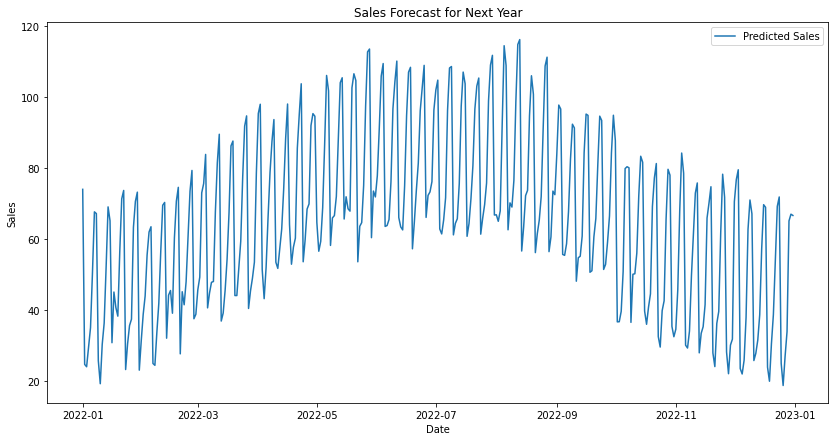

In [117]:
# Plot future sales
plt.figure(figsize=(14, 7))
plt.plot(future_data['date'], future_data['predicted_sales'], label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for Next Year')
plt.legend()
plt.show()

### Deep learning

#### Forecasting using deep learning algorithms:

##### a. Use sales amount for predictions instead of item count
##### b. Build a long short-term memory (LSTM) model for predictions
    • Define the train and test series
    • Generate synthetic data for the last 12 months
    • Build and train an LSTM model
    • Use the model to make predictions for the test data
##### c. Calculate the mean absolute percentage error (MAPE) and comment on the model's performance
##### d. Develop another model using the entire series for training, and use it to forecast for the next three months

In [118]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

2024-07-23 19:31:40.877700: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-23 19:31:40.914016: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


VOC-NOTICE: GPU memory for this assignment is capped at 1024MiB


2024-07-23 19:31:42.798339: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [119]:
# Aggregate data to daily sales
df_daily_sales = df.groupby('date')['sales'].sum().reset_index()

# Ensure date is sorted
df_daily_sales = df_daily_sales.sort_values('date')
df_daily_sales

,date,sales
0,2019-01-01,4023.0000
1,2019-01-02,3019.6750
2,2019-01-03,4007.6950
3,2019-01-04,4979.3025
4,2019-01-05,4927.5300
...,...,...
1091,2021-12-27,1840.2025
1092,2021-12-28,3426.5000
1093,2021-12-29,3715.3900
1094,2021-12-30,5266.2700


In [120]:
last_date = df_daily_sales['date'].max()

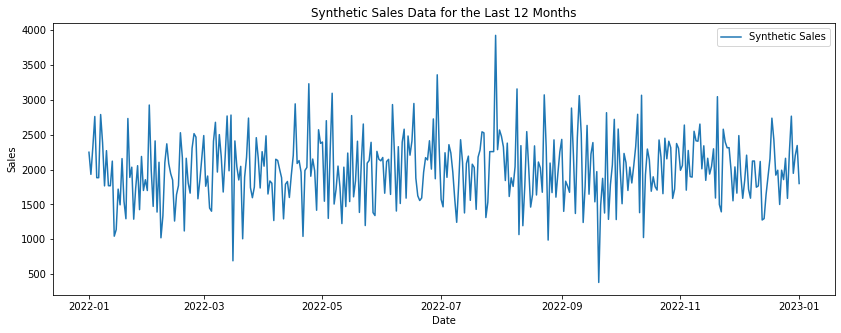

In [121]:
start_date = last_date + pd.DateOffset(days=1)
end_date = start_date + pd.DateOffset(months=12)

date_range = pd.date_range(start=start_date, end=end_date, freq='D')

# Generate synthetic sales data (e.g., random values around a mean)
np.random.seed(42)  # For reproducibility
synthetic_sales = np.random.normal(loc=2000, scale=500, size=len(date_range))

# Ensure no negative sales values
synthetic_sales = np.clip(synthetic_sales, 0, None)

# Create a DataFrame for synthetic data
synthetic_data = pd.DataFrame({
    'date': date_range,
    'sales': synthetic_sales
})

# Plot the synthetic data
plt.figure(figsize=(14, 5))
plt.plot(synthetic_data['date'], synthetic_data['sales'], label='Synthetic Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Synthetic Sales Data for the Last 12 Months')
plt.legend()
plt.show()

In [122]:
# Combine the original and synthetic data
combined_data = pd.concat([df_daily_sales, synthetic_data]).reset_index(drop=True)

# Sort by date to ensure the data is in chronological order
combined_data = combined_data.sort_values('date')

# Normalize the combined data
scaler = MinMaxScaler(feature_range=(0, 1))
combined_data['sales'] = scaler.fit_transform(combined_data[['sales']])
combined_data

,date,sales
0,2019-01-01,0.320533
1,2019-01-02,0.232270
2,2019-01-03,0.319187
3,2019-01-04,0.404660
4,2019-01-05,0.400106
...,...,...
1457,2022-12-28,0.209987
1458,2022-12-29,0.137785
1459,2022-12-30,0.160238
1460,2022-12-31,0.172925


In [123]:
# Define train and test series
train_size = int(len(combined_data) * 0.8)
train_data = combined_data['sales'].values[:train_size]
test_data = combined_data['sales'].values[train_size:]

In [124]:
# Helper function to create sequences
def create_sequences(data, seq_length):
    xs, ys = [], []
    for i in range(len(data) - seq_length):
        x = data[i:i+seq_length]
        y = data[i+seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

In [125]:
# Create sequences for LSTM
SEQ_LENGTH=30
X_train, y_train = create_sequences(train_data, SEQ_LENGTH)
X_test, y_test = create_sequences(test_data, SEQ_LENGTH)

In [126]:
X_train

array([[0.3205335 , 0.23227016, 0.31918711, ..., 0.15849826, 0.2069306 ,
        0.21339492],
       [0.23227016, 0.31918711, 0.40466023, ..., 0.2069306 , 0.21339492,
        0.3322301 ],
       [0.31918711, 0.40466023, 0.40010576, ..., 0.21339492, 0.3322301 ,
        0.44660824],
       ...,
       [0.17505026, 0.1501062 , 0.13748166, ..., 0.18670931, 0.15847521,
        0.11419264],
       [0.1501062 , 0.13748166, 0.12932433, ..., 0.15847521, 0.11419264,
        0.15846463],
       [0.13748166, 0.12932433, 0.07753509, ..., 0.11419264, 0.15846463,
        0.21021968]])

In [127]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(1))

In [128]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [129]:
# Reshape the data to fit the model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [130]:
# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
36/36 [==============================] - 4s 39ms/step - loss: 0.0536 - val_loss: 0.0105
Epoch 2/20
36/36 [==============================] - 1s 23ms/step - loss: 0.0258 - val_loss: 0.0044
Epoch 3/20
36/36 [==============================] - 1s 24ms/step - loss: 0.0269 - val_loss: 0.0023
Epoch 4/20
36/36 [==============================] - 1s 23ms/step - loss: 0.0265 - val_loss: 0.0020
Epoch 5/20
36/36 [==============================] - 1s 23ms/step - loss: 0.0256 - val_loss: 0.0021
Epoch 6/20
36/36 [==============================] - 1s 23ms/step - loss: 0.0252 - val_loss: 0.0019
Epoch 7/20
36/36 [==============================] - 1s 24ms/step - loss: 0.0245 - val_loss: 0.0021
Epoch 8/20
36/36 [==============================] - 1s 24ms/step - loss: 0.0241 - val_loss: 0.0020
Epoch 9/20
36/36 [==============================] - 1s 23ms/step - loss: 0.0232 - val_loss: 0.0020
Epoch 10/20
36/36 [==============================] - 1s 22ms/step - loss: 0.0236 - val_loss: 0.0019
Epoch 11/

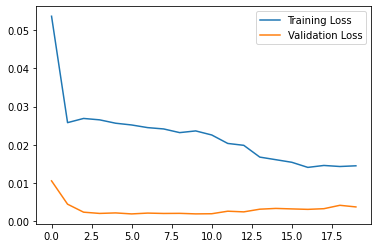

In [131]:
# Plot training history
plt.plot(model.history.history['loss'], label='Training Loss')
plt.plot(model.history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

In [132]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

9/9 [==============================] - 0s 5ms/step


In [133]:
# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
y_train_inv = scaler.inverse_transform(y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [134]:
# Calculate MAPE
mape = mean_absolute_percentage_error(y_test_inv, test_predict)
print(f'MAPE: {mape}')

MAPE: 0.32958507059452846


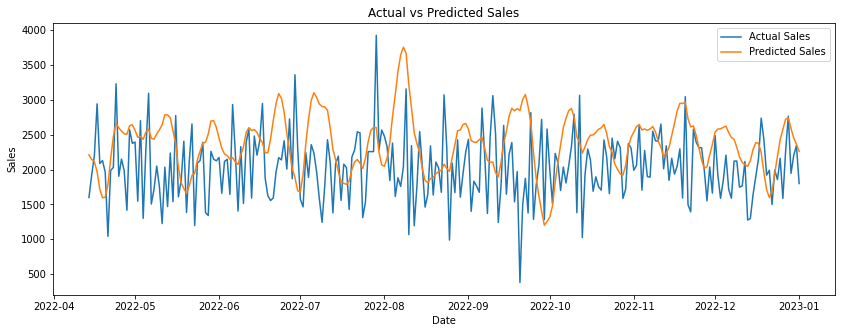

In [135]:

# Plot predictions vs actual values
plt.figure(figsize=(14, 5))
plt.plot(combined_data['date'][train_size + SEQ_LENGTH:], y_test_inv, label='Actual Sales')
plt.plot(combined_data['date'][train_size + SEQ_LENGTH:], test_predict, label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Actual vs Predicted Sales')
plt.legend()
plt.show()

In [136]:
# Train model on the entire dataset
full_scaled = combined_data['sales'].values
X_full, y_full = create_sequences(full_scaled, SEQ_LENGTH)

In [137]:
# Reshape the data to fit the model
X_full = np.reshape(X_full, (X_full.shape[0], X_full.shape[1], 1))

In [138]:
# Build and train the model on the entire dataset
model_full = Sequential()
model_full.add(LSTM(50, return_sequences=True, input_shape=(SEQ_LENGTH, 1)))
model_full.add(Dropout(0.2))
model_full.add(LSTM(50, return_sequences=False))
model_full.add(Dropout(0.2))
model_full.add(Dense(1))

In [139]:
model_full.compile(optimizer='adam', loss='mean_squared_error')
model_full.fit(X_full, y_full, epochs=20, batch_size=32)

Epoch 1/20
45/45 [==============================] - 4s 22ms/step - loss: 0.0337
Epoch 2/20
45/45 [==============================] - 1s 22ms/step - loss: 0.0218
Epoch 3/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0201
Epoch 4/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0211
Epoch 5/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0204
Epoch 6/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0207
Epoch 7/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0196
Epoch 8/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0206
Epoch 9/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0195
Epoch 10/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0192
Epoch 11/20
45/45 [==============================] - 1s 22ms/step - loss: 0.0186
Epoch 12/20
45/45 [==============================] - 1s 21ms/step - loss: 0.0161
Epoch 13/20
45/45 [==================

In [140]:
# Forecast the next three months (90 days)
last_sequence = full_scaled[-SEQ_LENGTH:]
future_predictions = []
current_seq = last_sequence.reshape((1, SEQ_LENGTH, 1))

In [ ]:
for _ in range(90):
    pred = model_full.predict(current_seq)
    future_predictions.append(pred[0, 0])
    current_seq = np.append(current_seq[:, 1:, :], pred.reshape((1, 1, 1)), axis=1)

In [ ]:
# Invert predictions
future_predictions_inv = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

In [ ]:
# Plot future predictions
future_dates = pd.date_range(start=combined_data['date'].max() + pd.Timedelta(days=1), periods=90)
plt.figure(figsize=(14, 5))
plt.plot(future_dates, future_predictions_inv, label='Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast for the Next 90 Days')
plt.legend()
plt.show()